In [1]:
import numpy as np
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import pandas as pd

from sklearn.cluster import KMeans
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import metrics

In [2]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [3]:
values_list = [2,3,4,5,6,7,8,9,10,15,25,50]

In [4]:
V1_icon_spcam_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/icon_spcam_kl.npy")
V1_icon_sam_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/icon_sam_kl.npy")
V1_icon_um_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/icon_um_kl.npy")
V1_icon_ifs_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/icon_ifs_kl.npy")
V1_icon_shield_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/icon_shield_kl.npy")
V1_icon_nicam_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/icon_nicam_kl.npy")
V1_icon_arpege_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/icon_arpege_kl.npy")
V1_icon_gem_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/icon_gem_kl.npy")

V2_icon_spcam_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V2_icon_spcam_kl.npy")
V2_icon_sam_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V2_icon_sam_kl.npy")
V2_icon_um_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V2_icon_um_kl.npy")
V2_icon_ifs_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V2_icon_ifs_kl.npy")
V2_icon_shield_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V2_icon_shield_kl.npy")
V2_icon_nicam_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V2_icon_nicam_kl.npy")
V2_icon_arpege_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V2_icon_arpege_kl.npy")
V2_icon_gem_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V2_icon_gem_kl.npy")

V3_icon_spcam_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V3_icon_spcam_kl.npy")
V3_icon_sam_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V3_icon_sam_kl.npy")
V3_icon_um_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V3_icon_um_kl.npy")
V3_icon_ifs_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V3_icon_ifs_kl.npy")
V3_icon_shield_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V3_icon_shield_kl.npy")
V3_icon_nicam_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V3_icon_nicam_kl.npy")
V3_icon_arpege_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V3_icon_arpege_kl.npy")
V3_icon_gem_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V3_icon_gem_kl.npy")

V4_icon_spcam_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V4_icon_spcam_kl.npy")
V4_icon_sam_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V4_icon_sam_kl.npy")
V4_icon_um_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V4_icon_um_kl.npy")
V4_icon_ifs_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V4_icon_ifs_kl.npy")
V4_icon_shield_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V4_icon_shield_kl.npy")
V4_icon_nicam_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V4_icon_nicam_kl.npy")
V4_icon_arpege_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V4_icon_arpege_kl.npy")
V4_icon_gem_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V4_icon_gem_kl.npy")

V5_icon_spcam_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V5_icon_spcam_kl.npy")
V5_icon_sam_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V5_icon_sam_kl.npy")
V5_icon_um_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V5_icon_um_kl.npy")
V5_icon_ifs_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V5_icon_ifs_kl.npy")
V5_icon_shield_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V5_icon_shield_kl.npy")
V5_icon_nicam_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V5_icon_nicam_kl.npy")
V5_icon_arpege_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V5_icon_arpege_kl.npy")
V5_icon_gem_kl = np.load("/fast/gmooers/gmooers_git/CBRAIN-CAM/MAPS/DYAMOND_VAEs/Mooers_Logbook/Clustering_KL_Analysis/Compressed_Data/V5_icon_gem_kl.npy")

In [5]:
icon_spcam_kl = np.mean(np.array([V1_icon_spcam_kl,V2_icon_spcam_kl,V3_icon_spcam_kl,V4_icon_spcam_kl,V5_icon_spcam_kl]),axis=0)
icon_sam_kl = np.mean(np.array([V1_icon_sam_kl,V2_icon_sam_kl,V3_icon_sam_kl,V4_icon_sam_kl,V5_icon_sam_kl]),axis=0)
icon_um_kl = np.mean(np.array([V1_icon_um_kl,V2_icon_um_kl,V3_icon_um_kl,V4_icon_um_kl,V5_icon_um_kl]),axis=0)
icon_ifs_kl = np.mean(np.array([V1_icon_ifs_kl,V2_icon_ifs_kl,V3_icon_ifs_kl,V4_icon_ifs_kl,V5_icon_ifs_kl]),axis=0)
icon_shield_kl = np.mean(np.array([V1_icon_shield_kl,V2_icon_shield_kl,V3_icon_shield_kl,V4_icon_shield_kl,V5_icon_shield_kl]),axis=0)
icon_nicam_kl = np.mean(np.array([V1_icon_nicam_kl,V2_icon_nicam_kl,V3_icon_nicam_kl,V4_icon_nicam_kl,V5_icon_nicam_kl]),axis=0)
icon_arpege_kl = np.mean(np.array([V1_icon_arpege_kl,V2_icon_arpege_kl,V3_icon_arpege_kl,V4_icon_arpege_kl,V5_icon_arpege_kl]),axis=0)
icon_gem_kl = np.mean(np.array([V1_icon_gem_kl,V2_icon_gem_kl,V3_icon_gem_kl,V4_icon_gem_kl,V5_icon_gem_kl]),axis=0)

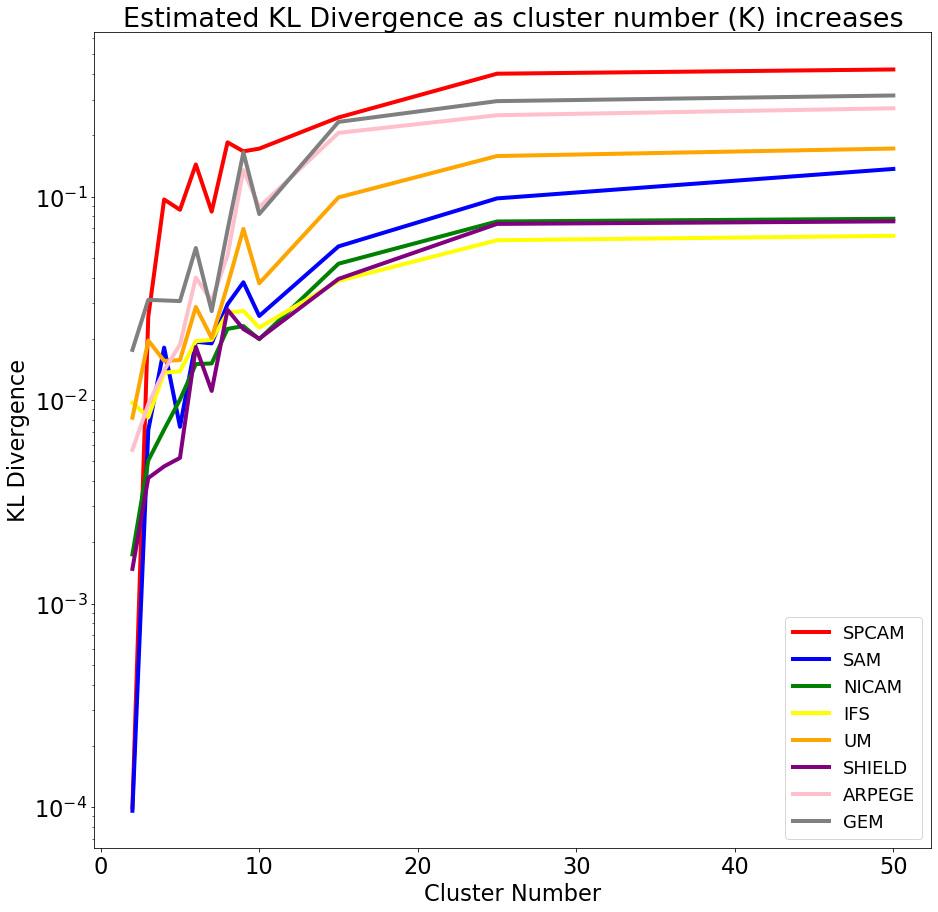

In [7]:
fig, ax = plt.subplots(figsize=(15,15))

ax.plot(values_list, icon_spcam_kl, color="red", label="SPCAM")
ax.plot(values_list, icon_sam_kl, color="blue", label="SAM")
ax.plot(values_list, icon_nicam_kl, color="green", label="NICAM")
ax.plot(values_list, icon_ifs_kl, color="yellow", label="IFS")
ax.plot(values_list, icon_um_kl, color="orange", label="UM")
ax.plot(values_list, icon_shield_kl, color="purple", label="SHIELD")
ax.plot(values_list, icon_arpege_kl, color="pink", label="ARPEGE")
ax.plot(values_list, icon_gem_kl, color="grey", label="GEM")

ax.set_title("Estimated KL Divergence as cluster number (K) increases")
ax.set_xlabel("Cluster Number")
ax.set_ylabel("KL Divergence")
ax.legend(fontsize=fz*0.8)
ax.set_yscale("log")

#plt.suptitle("Estimated KL Divergence as cluster number (K) increases")
plt.savefig("../Figures/SI2.png", bbox_inches='tight',pad_inches = 0.02)
plt.savefig("../Figures/SI2.pdf", bbox_inches='tight',pad_inches = 0.02)